**Maximum Likelihood Estimation**
___

In [1]:
import numpy as np

import scipy.stats as stats
import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Normal distribution:  generate a sample and fit with MLE

Generate a sample of size 5000 from the **Normal distribution** $\mathcal{N}(\mu=2, \sigma=1.5)$.

In [2]:
mu = 2
sigma = 1.5

**Random Number Generator**  
The packages we will use rely on `numpy.random` to generate random sequences.  
Initialize the random number generator with `default_rng(seed)` for reproducibility.
- https://numpy.org/doc/stable/reference/random/generator.html
- https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng

In [3]:
rng = np.random.default_rng(seed=42)

**Method 1: with `numpy`**  
Use the `normal` method of the random number generator we created.
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

**Method 2: with `scipy.stats`**  
See the method `rvs` of the class `rv_continuous`:  
`data = stats.norm.rvs(loc=mu , scale=sigma, size=5000, random_state=rng)`  
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.rvs.html

We now apply method 1.

In [4]:
data = rng.normal(loc=mu , scale=sigma , size=5000)

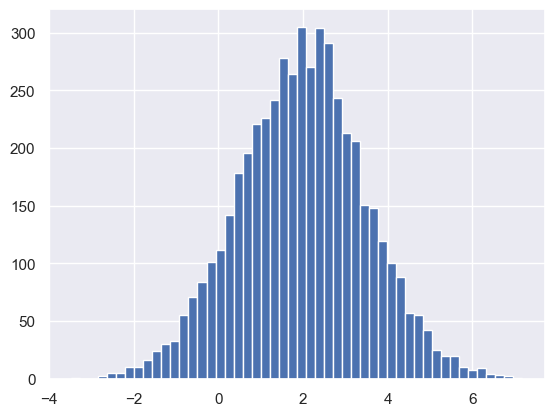

In [10]:
plt.hist(data, bins=50);

## Comparison of the sample distribution with the theoretical distribution

/Users/eandre/opt/anaconda3/envs/ASTAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


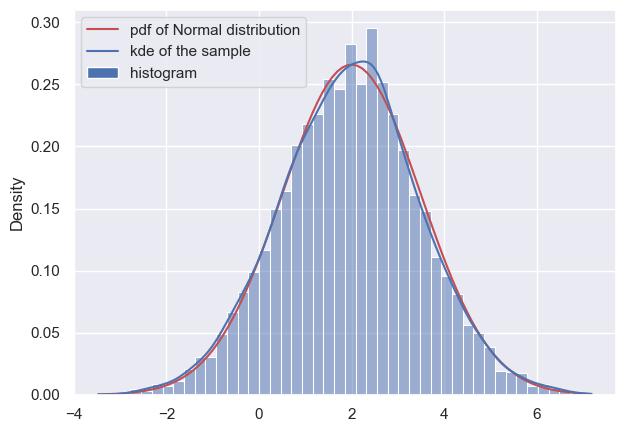

In [11]:
x = np.linspace(data.min(), data.max(), 100)
pdf = stats.norm.pdf(x ,loc=mu ,scale=sigma)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x, pdf, color='r')
sns.histplot(data, kde=True, stat='density', ax=ax)
ax.legend(['pdf of Normal distribution', 'kde of the sample', 'histogram']);

## Variability of the sample mean estimator

In [17]:
rng.normal(loc=mu, scale=sigma, size=50).mean()

2.3405476904938833

In [18]:
sample_means_50 = [rng.normal(loc=mu, scale=sigma, size=50).mean() for i in range(500)]

In [19]:
sample_means_200 = [rng.normal(loc=mu, scale=sigma, size=200).mean() for i in range(500)]

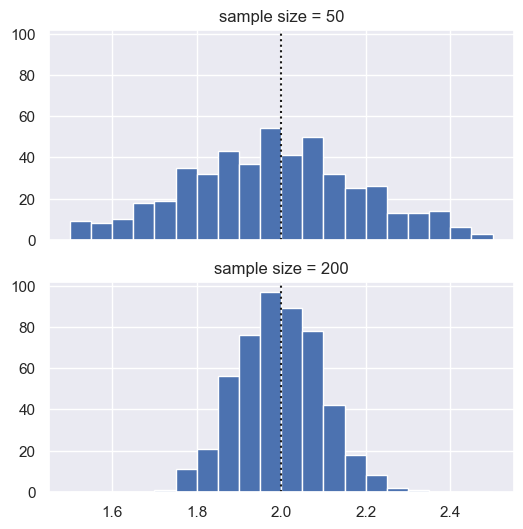

In [21]:
bins = np.linspace(mu-0.5, mu+0.5, 21)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
ax1.hist(sample_means_50, bins=bins)
ax1.axvline(mu, c='k', ls=':')
ax1.set_title("sample size = 50")
ax2.hist(sample_means_200, bins=bins)
ax2.axvline(mu, c='k', ls=':')
ax2.set_title("sample size = 200");

In [22]:
print("Standard deviation of the estimator")
print("Sample of size 50:")
print(f"- theoretical = {sigma/(50**0.5):.5f}")
print(f"- empirical = {np.std(sample_means_50):.5f}")
print("Sample of size 200:")
print(f"- theoretical = {sigma*200**(-0.5):.5f}")
print(f"- empirical = {np.std(sample_means_200):.5f}")

Standard deviation of the estimator
Sample of size 50:
- theoretical = 0.21213
- empirical = 0.22119
Sample of size 200:
- theoretical = 0.10607
- empirical = 0.09922


## Maximum Likelihood Estimators

Compute the MLE for `data`. Use `scipy.stats.rv_continuous.fit`.  
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html>

In [26]:
mu_fit, sigma_fit = stats.norm.fit(data)

In [24]:
mu_fit

1.9701844407617009

In [27]:
print(f'sample mean        : {data.mean():0.5f}')
print(f'MLE of the mean    : {mu_fit:0.5f}')
print(f'sample std dev     : {data.std(ddof=1):0.5f}') # use the unbiased estimator
print(f'MLE of the std dev : {sigma_fit:0.5f}')

sample mean        : 1.97018
MLE of the mean    : 1.97018
sample std dev     : 1.49918
MLE of the std dev : 1.49903


# *t* distribution:  generate a sample and fit with MLE

Generate a sample from the **Student's *t* distribution**.  

In `numpy`, only the standard *t* distribution is available. We will use `scipy` to add location and scale.   

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [28]:
nu = 5
loc = 2
scale = 1.5
data_t = stats.t.rvs(df=nu , loc=loc , scale=scale , size=5000 , random_state=rng)

/Users/eandre/opt/anaconda3/envs/ASTAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

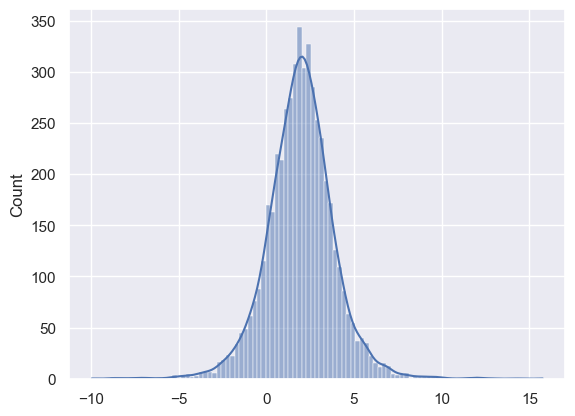

In [30]:
sns.histplot(data_t, kde=True)

Compute the MLE for `data_t`. Use `scipy.stats.rv_continuous.fit`.\
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html>

In [31]:
shape_fit, loc_fit, scale_fit = stats.t.fit(data_t)

print(f'theoretical std dev       : {scale*np.sqrt(nu/(nu-2)):0.5f}')
print(f'sample mean               : {data_t.mean():0.5f}')
print(f'sample std dev            : {data_t.std(ddof= 1):0.5f}')
print(f'MLE of the location param : {loc_fit:0.5f}')
print(f'MLE of the scale param    : {scale_fit:0.5f}')
print(f'MLE of the df             : {shape_fit:0.5f}')

theoretical std dev       : 1.93649
sample mean               : 1.96432
sample std dev            : 1.94295
MLE of the location param : 1.96525
MLE of the scale param    : 1.49144
MLE of the df             : 4.82699


# Negative Log Likelihood function for a Normal distribution

Compute the log likelihood for arrays of values of $\mu$ and $\sigma$.\
See *numpy*'s broadcasting rules: <https://numpy.org/devdocs/user/theory.broadcasting.html>.

In [37]:
data[:, np.newaxis].shape

(5000, 1)

In [38]:
def norm_loglik(sample, mu, sigma):
    """
    Compute log-likelihood for Normal dist
    Takes 3 arrays as input
    If one input is scalar, then it must be given as np.array([scalar])
    returns an array of shape (len(sigma), len(mu))
    """
    n = len(sample)
    ll = 0.5 * ((sample[:, np.newaxis] - mu[np.newaxis, :]) ** 2).sum(axis=0)
    ll = ll[np.newaxis, :] / (sigma[:, np.newaxis] ** 2)
    ll += n / 2 * np.log(2 * np.pi * sigma[:, np.newaxis] ** 2)
    return ll

## Variation of the LL as a function of $\mu$

Plot the variation of the LL for $-2 \le \mu \le 6$ and $\sigma=1.5$.

In [39]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [40]:
np.eye(3).ravel()

array([1., 0., 0., 0., 1., 0., 0., 0., 1.])

In [41]:
np.eye(3).ravel().reshape((3,3))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

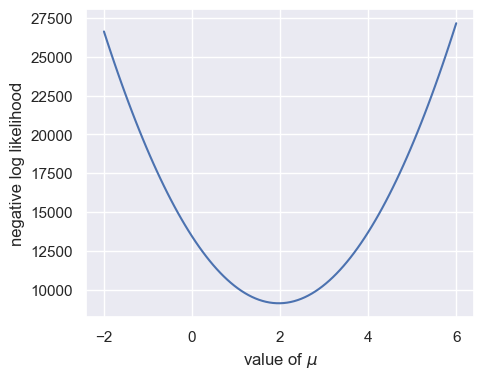

In [42]:
m = np.linspace(-2, 6, 101)
s = np.array([1.5])
nll = norm_loglik(data, m, s).ravel()

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(m, nll)
ax.set_xlabel('value of $\mu$')
ax.set_ylabel('negative log likelihood');

## Variation of the LL as a function of $\sigma$

Plot the variation of the LL for $\mu = 2$ and $1 \le \sigma \le 3$.

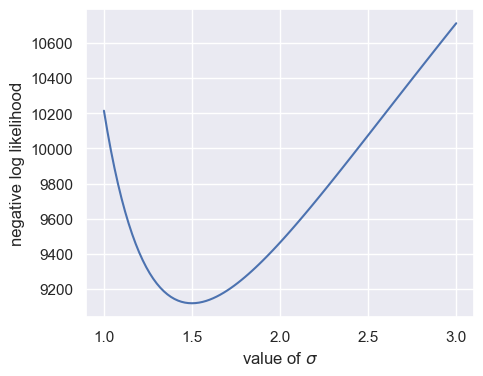

In [43]:
s = np.linspace(1, 3, 101)
m = np.array([2])
nll = norm_loglik(data, m, s).ravel()

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(s, nll)
ax.set_xlabel(r'value of $\sigma$')
ax.set_ylabel('negative log likelihood');

## Variation of the LL as a function of both $\mu$ and $\sigma$

Plot the variation of the LL for $0 \le \mu \le 4$ and $1 \le \sigma \le 3$.

In [46]:
x = [1, 2, 3]
y = [4, 5, 6]
np.meshgrid(x, y)

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])]

In [44]:
m = np.linspace(0, 4, 101)
s = np.linspace(1, 3, 101)
M, S = np.meshgrid(m, s)
Z = norm_loglik(data, m, s)

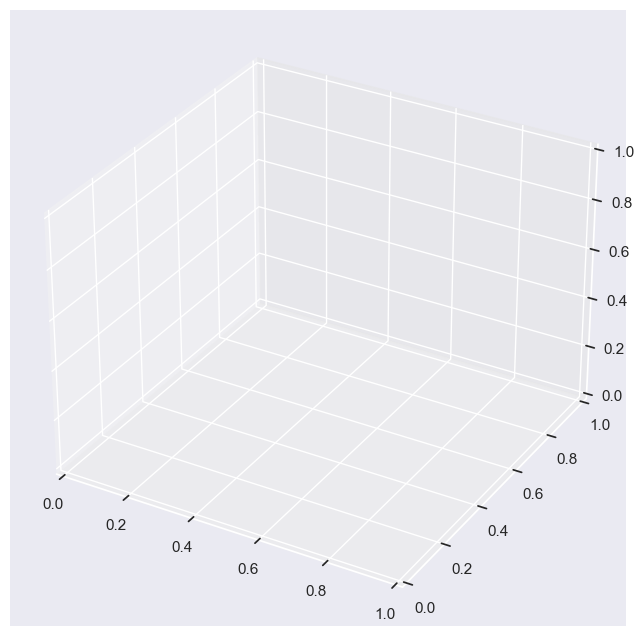

In [50]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection' : '3d'})

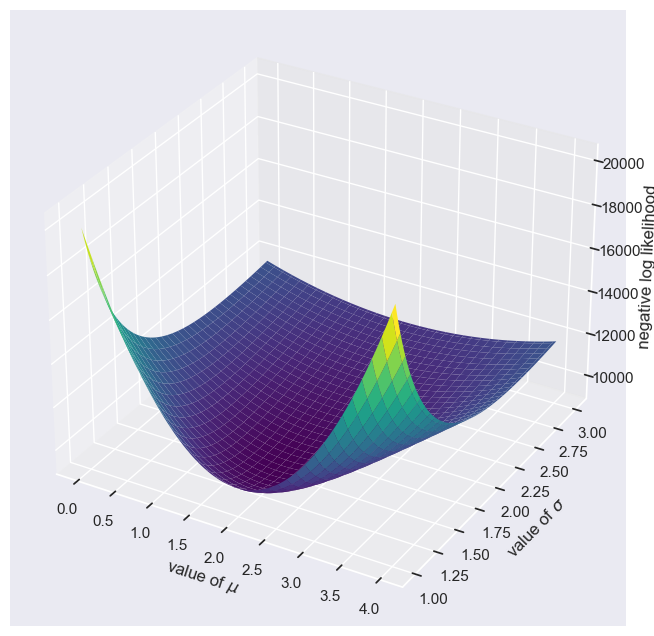

In [52]:
# 3D plots
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection' : '3d'})
ax.plot_surface(M, S, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'value of $\mu$')
ax.set_ylabel(r'value of $\sigma$')
ax.set_zlabel('negative log likelihood');

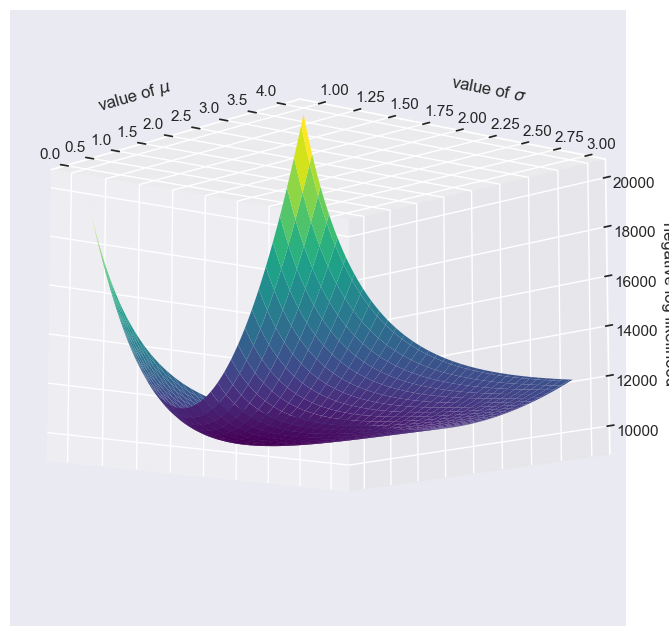

In [53]:
ax.view_init(elev=-10, azim=-40, roll=0)
fig

# Use of *scipy.optimize.minimize* to find the MLE
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html>

We first need to rewrite a function consistent with *scipy.optimize*.

In [54]:
def norm_loglik_scalar(x, data):
    """
    Compute log-likelihood for Normal dist
    x is an array that contains the scalars mu and sigma
    """
    mu, sigma = x
    n = len(data)
    ll = 0.5 * ((data - mu) ** 2).sum() / (sigma ** 2)
    ll += n / 2 * np.log(2 * np.pi * sigma ** 2)
    return ll

Initial guess

In [56]:
x0 = np.array([0,1])

Run the optimizer

In [57]:
res = opt.minimize(fun=norm_loglik_scalar, x0=x0 , args=(data), options={'disp': True})

Optimization terminated successfully.
         Current function value: 9118.789774
         Iterations: 13
         Function evaluations: 54
         Gradient evaluations: 18


In [58]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9118.78977434838
        x: [ 1.970e+00  1.499e+00]
      nit: 13
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 4.641e-04 -3.146e-06]
            [-3.146e-06  1.444e-04]]
     nfev: 54
     njev: 18

Print the results

In [59]:
print('scipy.optimize.minimize')
print(f'  MLE of the mean    : {res.x[0]:0.5f}')
print(f'  MLE of the std dev : {res.x[1]:0.5f}')
print('scipy.stats.fit')
print(f'  MLE of the mean    : {mu_fit:0.5f}')
print(f'  MLE of the std dev : {sigma_fit:0.5f}')

scipy.optimize.minimize
  MLE of the mean    : 1.97018
  MLE of the std dev : 1.49903
scipy.stats.fit
  MLE of the mean    : 1.97018
  MLE of the std dev : 1.49903
